In [1]:
# --- Cell 1: Imports & Project Path Setup ---

import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Stats & Time-Series Tools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Make project modules importable (utils, analysis, etc.)
sys.path.append("..")  # allows importing project modules

from analysis.utils.connection import get_conn  # your SQL connection helper

print("Imports successful.")

Imports successful.


In [3]:
def load_daily_sales():
    conn = get_conn()
    query = """ SELECT Date, TotalSalesUSD FROM dbo.vw_SalesSummary_ByDate Order By Date""";
    df = pd.read_sql(query, conn)
    conn.close()
#Ensure date and time sorting
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values("Date").set_index("Date")
    return df
daily_sales = load_daily_sales()
print("Daily data shape: ", daily_sales.shape)
display(daily_sales.head())
display(daily_sales.tail())

Daily data shape:  (1641, 1)


C:\Users\athil\AppData\Local\Temp\ipykernel_17008\3661737728.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,TotalSalesUSD
Date,
2016-01-01,37442.42
2016-01-02,96226.98
2016-01-03,362.64
2016-01-04,9524.94
2016-01-05,22996.38


,TotalSalesUSD
Date,
2021-02-16,27700.99
2021-02-17,77408.70
2021-02-18,35307.64
2021-02-19,36476.44
2021-02-20,61697.45


In [5]:
weekly_sales = ( daily_sales["TotalSalesUSD"]
                .resample("W")
                .sum())
print("Weekly Data Points: ",len(weekly_sales))
display(weekly_sales.head())
display(weekly_sales.tail())

Weekly Data Points:  269


Date
2016-01-03    134032.04
2016-01-10    137504.52
2016-01-17    170286.64
2016-01-24    130901.92
2016-01-31    160754.38
Freq: W-SUN, Name: TotalSalesUSD, dtype: float64

Date
2021-01-24     78708.02
2021-01-31    137819.16
2021-02-07    111944.77
2021-02-14    169505.24
2021-02-21    248246.93
Freq: W-SUN, Name: TotalSalesUSD, dtype: float64

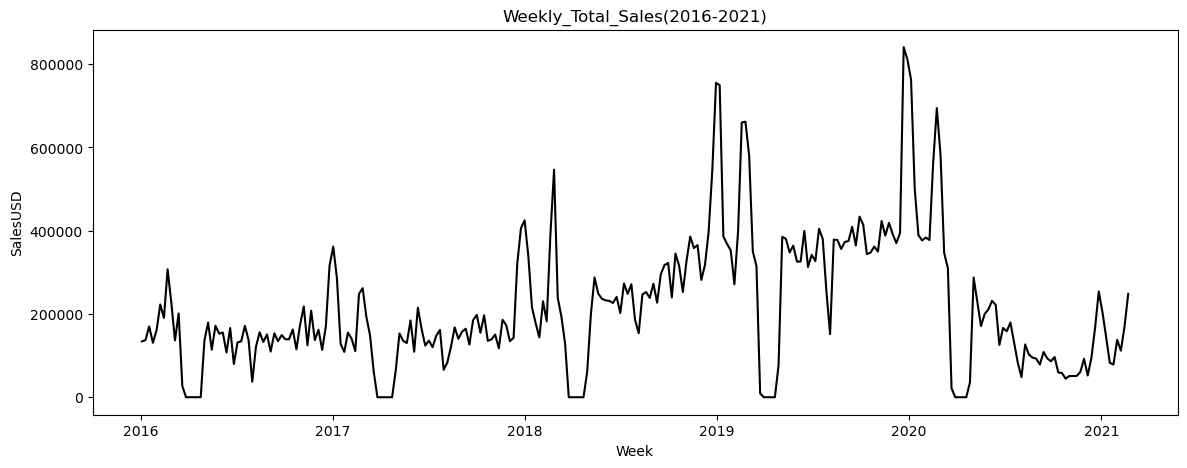

In [7]:
plt.figure(figsize = (14,5))
plt.plot(weekly_sales, color = "black")
plt.title("Weekly_Total_Sales(2016-2021)")
plt.xlabel("Week")
plt.ylabel("SalesUSD")
plt.show()

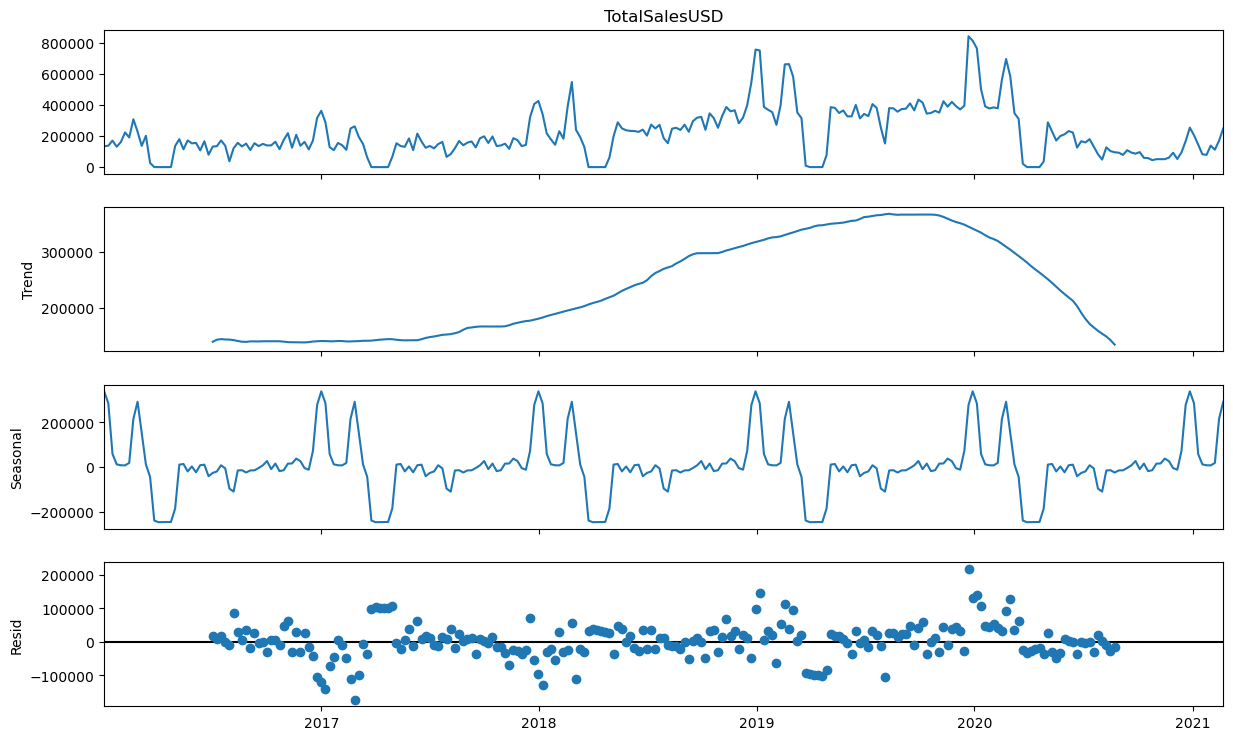

In [9]:
decomposition = seasonal_decompose(weekly_sales, model = "additive", period = 52 )
fig = decomposition.plot()
fig.set_size_inches(14,8)
plt.show()

In [11]:
def adf_test(series, title=""):
    print(f"ADF Test: {title}")
    result = adfuller(series.dropna())
    labels = ["ADF Statistics", "p-value", "#Lags used", "#Observations"]
    for value, label in zip(result[:4], labels):
        print(f"{label}:{value}")
    print("Critical values: ")
    for key, value in result[4].items():
        print("  {key}:{value}")
    if result[1] < 0.05:
        print("Reject H0 series is Stationary")
    else:
        print("Fail to reject H0 Series is non stationary")
    print("-"*50)

adf_test(weekly_sales, title="Weekly sales (original)")

ADF Test: Weekly sales (original)
ADF Statistics:-2.8957390790542443
p-value:0.04584573294961374
#Lags used:6
#Observations:262
Critical values: 
  {key}:{value}
  {key}:{value}
  {key}:{value}
Reject H0 series is Stationary
--------------------------------------------------


In [13]:
weekly_diff_1 = weekly_sales.diff()
print("First Differenced Series: ")
display(weekly_diff_1.head(10))

First Differenced Series: 


Date
2016-01-03          NaN
2016-01-10      3472.48
2016-01-17     32782.12
2016-01-24    -39384.72
2016-01-31     29852.46
2016-02-07     62084.48
2016-02-14    -32316.02
2016-02-21    116828.26
2016-02-28    -79407.06
2016-03-06    -91358.10
Freq: W-SUN, Name: TotalSalesUSD, dtype: float64

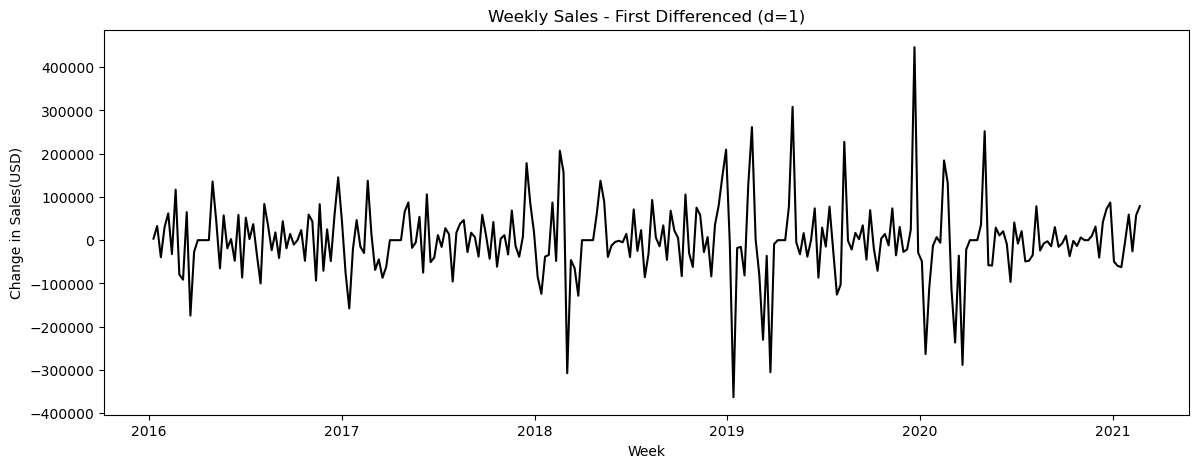

In [15]:
plt.figure(figsize=(14,5))
plt.plot(weekly_diff_1, color="black")
plt.title("Weekly Sales - First Differenced (d=1)")
plt.xlabel("Week")
plt.ylabel("Change in Sales(USD)")
plt.show()

In [17]:
adf_test(weekly_diff_1, title="Weekly Sales (First Differenced)")

ADF Test: Weekly Sales (First Differenced)
ADF Statistics:-6.09500187059419
p-value:1.0150516596923334e-07
#Lags used:16
#Observations:251
Critical values: 
  {key}:{value}
  {key}:{value}
  {key}:{value}
Reject H0 series is Stationary
--------------------------------------------------


In [19]:
weekly_diff_seasonal = weekly_diff_1.diff(52)

print("Seasonally differenced series:")
display(weekly_diff_seasonal.head(60))

Seasonally differenced series:


Date
2016-01-03          NaN
2016-01-10          NaN
2016-01-17          NaN
2016-01-24          NaN
2016-01-31          NaN
2016-02-07          NaN
2016-02-14          NaN
2016-02-21          NaN
2016-02-28          NaN
2016-03-06          NaN
2016-03-13          NaN
2016-03-20          NaN
2016-03-27          NaN
2016-04-03          NaN
2016-04-10          NaN
2016-04-17          NaN
2016-04-24          NaN
2016-05-01          NaN
2016-05-08          NaN
2016-05-15          NaN
2016-05-22          NaN
2016-05-29          NaN
2016-06-05          NaN
2016-06-12          NaN
2016-06-19          NaN
2016-06-26          NaN
2016-07-03          NaN
2016-07-10          NaN
2016-07-17          NaN
2016-07-24          NaN
2016-07-31          NaN
2016-08-07          NaN
2016-08-14          NaN
2016-08-21          NaN
2016-08-28          NaN
2016-09-04          NaN
2016-09-11          NaN
2016-09-18          NaN
2016-09-25          NaN
2016-10-02          NaN
2016-10-09          NaN
2016-10-16 

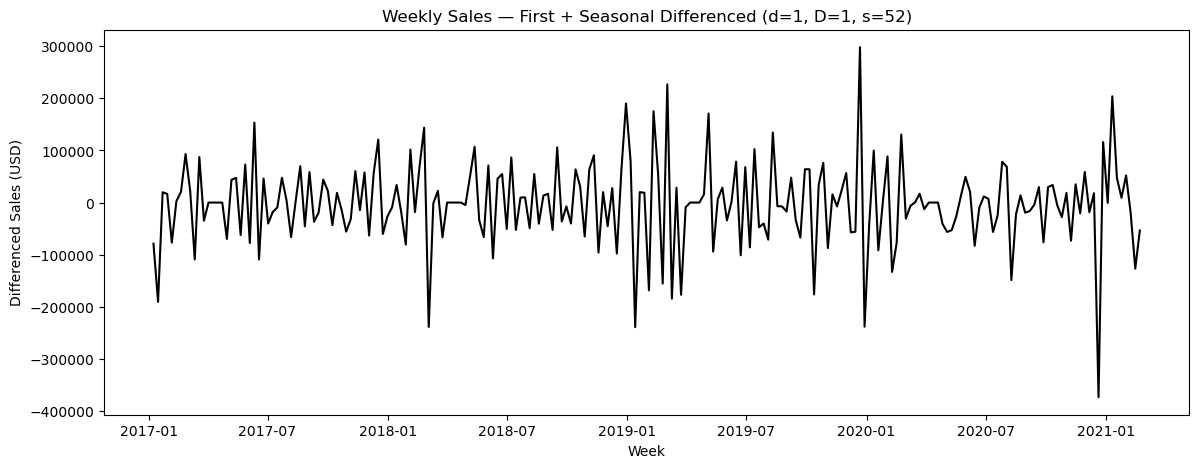

In [21]:
plt.figure(figsize=(14, 5))
plt.plot(weekly_diff_seasonal, color="black")
plt.title("Weekly Sales — First + Seasonal Differenced (d=1, D=1, s=52)")
plt.xlabel("Week")
plt.ylabel("Differenced Sales (USD)")
plt.show()

In [23]:
adf_test(
    weekly_diff_seasonal.dropna(),
    title="Weekly Sales (First + Seasonal Differenced)"
)

ADF Test: Weekly Sales (First + Seasonal Differenced)
ADF Statistics:-9.691816205051245
p-value:1.1311970961321216e-16
#Lags used:6
#Observations:209
Critical values: 
  {key}:{value}
  {key}:{value}
  {key}:{value}
Reject H0 series is Stationary
--------------------------------------------------


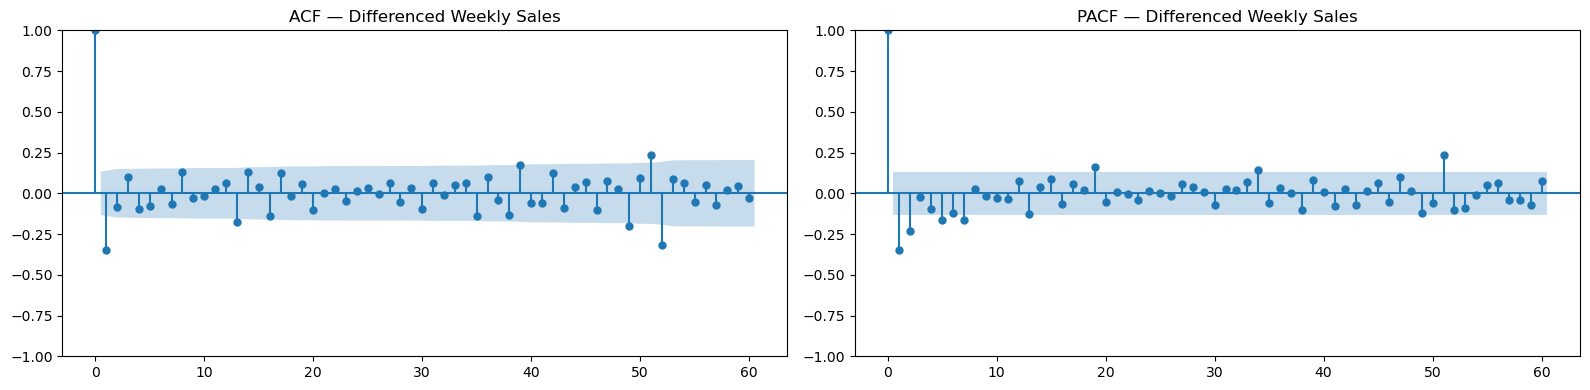

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(
    weekly_diff_seasonal.dropna(),
    lags=60,
    ax=axes[0]
)
axes[0].set_title("ACF — Differenced Weekly Sales")

plot_pacf(
    weekly_diff_seasonal.dropna(),
    lags=60,
    ax=axes[1],
    method="ywm"
)
axes[1].set_title("PACF — Differenced Weekly Sales")

plt.tight_layout()
plt.show()

In [27]:
model = SARIMAX(
    weekly_sales,
    order=(1, 1, 1),
    seasonal_order=(0, 1, 0, 52),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_results = model.fit(disp=False)

print(sarima_results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                       TotalSalesUSD   No. Observations:                  269
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 52)   Log Likelihood               -2695.121
Date:                             Tue, 23 Dec 2025   AIC                           5396.242
Time:                                     21:53:48   BIC                           5406.340
Sample:                                 01-03-2016   HQIC                          5400.323
                                      - 02-21-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2655      0.100      2.646      0.008       0.069       0.462
ma.L1         -0.7682      

In [29]:
forecast_steps = 26

forecast_obj = sarima_results.get_forecast(steps=forecast_steps)
forecast_df = forecast_obj.summary_frame()

display(forecast_df.head())

TotalSalesUSD,mean,mean_se,mean_ci_lower,mean_ci_upper
2021-02-28,187214.516807,73310.567442,43528.444935,330900.588678
2021-03-07,-36043.579781,81874.690694,-196515.024786,124427.865224
2021-03-14,-68340.952214,86109.109369,-237111.705319,100429.800891
2021-03-21,-355982.464568,89410.608208,-531224.036491,-180740.892645
2021-03-28,-377415.796208,92417.527213,-558550.821085,-196280.771331


In [31]:
last_date = weekly_sales.index[-1]

forecast_df.index = pd.date_range(
    start=last_date + pd.Timedelta(weeks=1),
    periods=forecast_steps,
    freq="W"
)

forecast_df.head()

TotalSalesUSD,mean,mean_se,mean_ci_lower,mean_ci_upper
2021-02-28,187214.516807,73310.567442,43528.444935,330900.588678
2021-03-07,-36043.579781,81874.690694,-196515.024786,124427.865224
2021-03-14,-68340.952214,86109.109369,-237111.705319,100429.800891
2021-03-21,-355982.464568,89410.608208,-531224.036491,-180740.892645
2021-03-28,-377415.796208,92417.527213,-558550.821085,-196280.771331


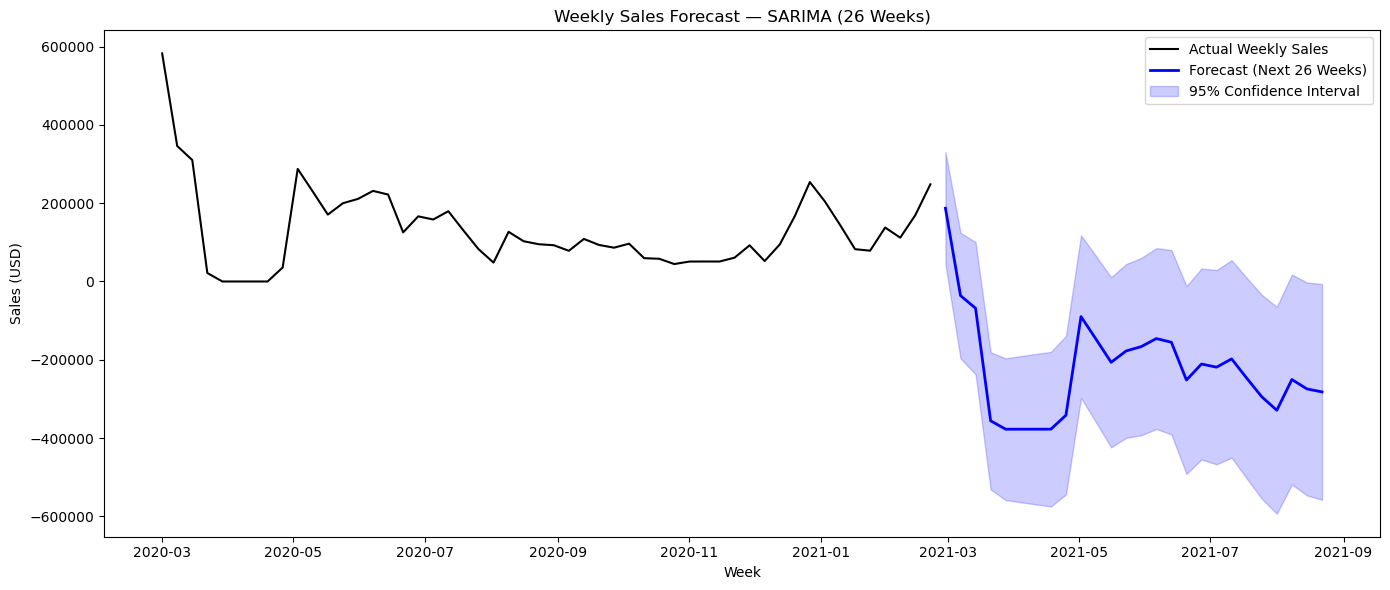

In [33]:
plt.figure(figsize=(14, 6))

# Plot recent history
plt.plot(
    weekly_sales[-52:],
    label="Actual Weekly Sales",
    color="black"
)

# Plot forecast
plt.plot(
    forecast_df["mean"],
    label="Forecast (Next 26 Weeks)",
    color="blue",
    linewidth=2
)

# Confidence interval
plt.fill_between(
    forecast_df.index,
    forecast_df["mean_ci_lower"],
    forecast_df["mean_ci_upper"],
    color="blue",
    alpha=0.2,
    label="95% Confidence Interval"
)

plt.title("Weekly Sales Forecast — SARIMA (26 Weeks)")
plt.xlabel("Week")
plt.ylabel("Sales (USD)")
plt.legend()
plt.tight_layout()
plt.show()